# Homework 4

This homework will focus on computing parameter estimates for linear and non-linear regression models in the Julia language.  The ideal homework submission would be a PDF of a Jupyter notebook, to be submitted on Moodle.

---
## Problem 1

Assume that we are given the model 

$$ y = f(x) = \beta_0 + \beta_1 x + \beta_2 \sin(x), $$ 

along with N=100 samples of $x$ and $y$ (given below).  While this model contains non-linear stuff (with the $x$ variable), it remains linear with respect to the coefficients ($\beta$).  Your task is to construct the normal equations and find the OLS estimates for $\beta_0$, $\beta_1$, and $\beta_2$ from the data.  Your final answer should be a plot of the data and your estimated line of best fit.  Compare your estimate with the "true" model given below.

Important: Use the $x$ and $y$ data I generate below.  Your work should start *after* the scatter plot.

In [1]:
# These are the needed packages for this homework assignment
# If you haven't already, you will need to install them
using Distributions, StatsPlots, Random, Plots

In [2]:
# This is the data you should use, be careful to not overwrite it.
Random.seed!(1); # Set the random seed!
N = 100
xdist = Uniform(0,10)
ydist = Uniform(-2,2)

# Define the "True" function
# Important: You are trying to recreate this!
f(x) = 10 .- 2*x .+ 3*sin.(x) 

x = rand(xdist,N)
y = f(x) + rand(ydist,N);

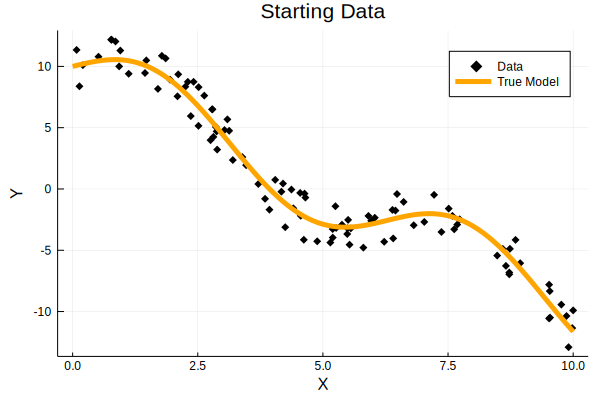

In [3]:
# Plot the raw data
scatter(x,y, marker=:diamond, color=:black, 
    xlabel="X", ylabel="Y", label="Data",
    title="Starting Data")

# Plot the "True" model
xvec = 0:0.1:10
plot!(xvec,f(xvec), label="True Model", linewidth=5, color=:orange)

### Your work starts here:

In [4]:
using LinearAlgebra

In [5]:
X = [ones(N) x sin.(x)]
β= inv(transpose(X)*X)*transpose(X)*y
g(x) = β[1] .+β[2]*x .+ β[3]*sin.(x) 
β

3-element Array{Float64,1}:
 10.199311452774948
 -2.029082118504809
  3.024750870757485

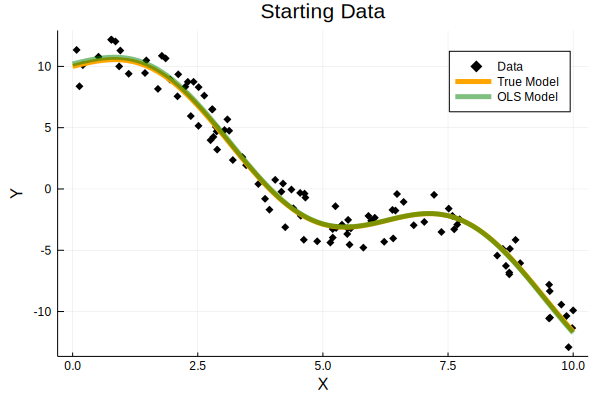

In [6]:
plot!(xvec,g.(xvec), label="OLS Model", linewidth=5, color=:green, alpha=0.5)

---
## Problem 2

In class we introduced Newton's Method for finding roots of functions.  For this problem, you will write your own Newton's Method function.  Your function should take as input a function of $x$, its derivative as a function of $x$, and a starting guess ($x_0$).  Your function should return the value of $x$ that makes your supplied function zero.  Be sure to test your method with at least 2 different starting functions.

For example, if my starting function was $$ f(x) = 2x^3 - 16, $$ then the derivative of my function would be $$ f'(x) = g(x) = 6x^2, $$ and my starting guess might be $x_0 = 0$.  I could write my two functions in Julia with:

In [62]:
f(x) = 2*x^3 - 16
f_prime(x) = 6*x^2 ;
f_2(x) = 5*x^3-2*x+log(x)
f_2prime(x) = 15*x^2-2+1/x
f_3(x) = log(x^2)+5*x
f_3prime(x) = 2*x+5

f_3prime (generic function with 1 method)

This function is zero when $x=2$, so my Newton's Method function should return **2**.  

To get you started, here is a Julia function template with the necessary inputs and return.

In [63]:
function my_newton_method(f,f_prime,x0)
    tolerance = 0.001 # Use this tolerance to determine if you have converged!
    
    if f_prime(x0) == 0
        print("slope became 0")
        return false
    end

    # Your commands go here!
    final_x = (f_prime(x0)*x0-f(x0))/f_prime(x0)
    println("final x: ",final_x)
    while tolerance < abs(final_x-x0)
        x0 = final_x
        if f_prime(x0) == 0
            print("slope became 0")
            return false
        end
        final_x = (f_prime(x0)*x0-f(x0))/f_prime(x0)
        println("final x: ",final_x)

    end
        
    
    return final_x
end

my_newton_method (generic function with 1 method)

In [64]:
# Once your function is written, call it like this:
my_newton_method(f,f_prime,2)

final x: 2.0


2.0

In [65]:
my_newton_method(f,f_prime,-5)

final x: -3.2266666666666666
final x: -1.8949810653492094
final x: -0.5207138061874339
final x: 9.487771014894713
final x: 6.354804447687245
final x: 4.302569803573621
final x: 3.0124297429486395
final x: 2.3021427089791096
final x: 2.0379196511159785
final x: 2.0007011962352825
final x: 2.00000024572321


2.00000024572321

In [66]:
my_newton_method(f,f_prime,14)

final x: 9.346938775510203
final x: 6.261815708148594
final x: 4.242553084138794
final x: 2.9765229890881026
final x: 2.2853374001020734
final x: 2.03414329765263
final x: 2.000569892142483
final x: 2.0000001623268533


2.0000001623268533

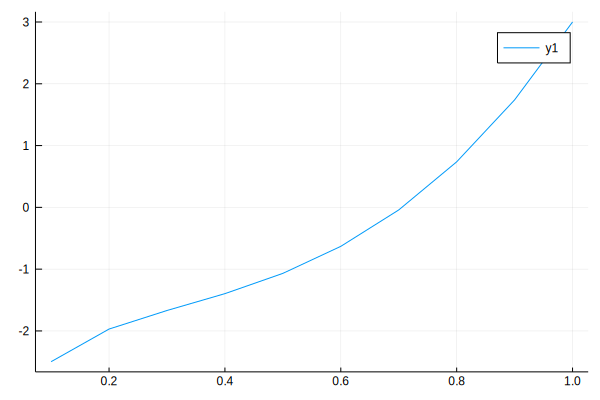

In [67]:
x_vec = 0.1:0.1:1
plot(x_vec, f_2.(x_vec))

In [68]:
pts = my_newton_method(f_2,f_2prime,0.01)

final x: 0.05719484075231594
final x: 0.2487041762634161
final x: 0.8632174081667726
final x: 0.7333186725248342
final x: 0.7070843358805687
final x: 0.706097233135209


0.706097233135209

In [82]:
f_2(pts)

-308.54640246120215

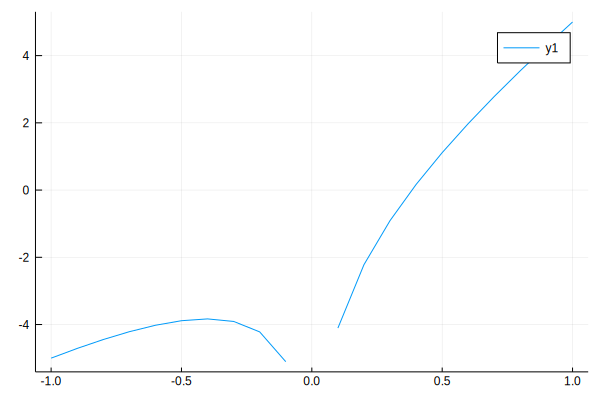

In [70]:
x_vec=-1:00.1:1
plot(x_vec,f_3.(x_vec))

In [87]:
my_newton_method(f_3,f_3prime,-1)

final x: 0.6666666666666666
final x: 0.26839249027977113
final x: 0.5011353655846628
final x: 0.31388643412978323
final x: 0.44680151676391555
final x: 0.3411401842743007
final x: 0.41949299810020224
final x: 0.35783021929128767
final x: 0.4044113995641241
final x: 0.3680164537495603
final x: 0.3957661188739694
final x: 0.3741886006939773
final x: 0.3907232939973886
final x: 0.3779055408910729
final x: 0.3877554660476895
final x: 0.3801342234639862
final x: 0.386000377266611
final x: 0.38146676350604186
final x: 0.38495965260545495
final x: 0.3822620818116563
final x: 0.3843415676041548
final x: 0.3827362458671718
final x: 0.383974154974347
final x: 0.38301875320095263


0.38301875320095263

---
## Problem 3

Newton's Method is just one method of finding zeros of a function.  Another, vastly simpler method is Bisection.  The idea behind Bisection is you supply the function and two endpoints, such that a single root of the function lies between them, and thus one endpoint is positive, and the other is negative.  The Bisection method then proceeds to cut the interval in half, using the sign of the center to know which side to keep.

As an example, if I had the function $f(x) = 2x^3 - 16$, which we known from before has a root at $x=2$, I could supply the endpoints $x_0=0$ and $x_1=3$, or written with interval notation $[0,3]$, since the root ($x=2$) lies between them.

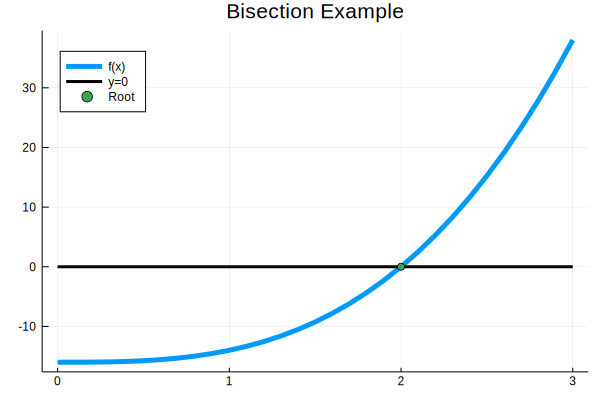

In [12]:
f(x) = 2*x^3 - 16
xvec = 0:0.1:3
plot(xvec,f.(xvec),linewidth=5,title="Bisection Example",label="f(x)",legend=:topleft)
plot!(xvec,zeros(length(xvec)),linewidth=3,color=:black,label="y=0")
scatter!([2],[0],label="Root")

Cutting our interval in half, $\frac{x_0 + x_1}{2}$ produces $x_2=1.5$.  Since $f(1.5)<0$, we should update our interval from $[0,3]$ to $[1.5,3]$.  This process repeats until our interval is small.

Your task is to write your own vesion of Bisection and test it with a few functions.

In [17]:
function my_bisection(f,x0,x1)
    tolerance = 0.001 # Use this tolerance to determine if you have converged!
    
    # Your commands go here!
    
    if f(x0)*f(x1) > 0
        println("There is no single root between ", x0, " and ", x1)
        return false
    end
    
    if f(x0) == 0
        return x0
    elseif f(x1) == 0
        return x1
    end
    
    if f(x1) < f(x0)
        temp = x0
        x0 = x1
        x1 = temp
    end
    
    while abs(x1-x0) > tolerance
        x2 = (x0+x1)/2
        if f(x2) > 0
            x1 = x2
        elseif f(x2) < 0
            x0 = x2
        else
            return x2
        end
        println("x1: ", x1," ,x0: ", x0," ,diff: ",abs(x1-x0))
    end     
            
    final_x = (x0+x1)/2
    
    return final_x
end

my_bisection (generic function with 1 method)

In [18]:
# Once your function is written, call it like this:
my_bisection(f,0,10)

x1: 5.0 ,x0: 0 ,diff: 5.0
x1: 2.5 ,x0: 0 ,diff: 2.5
x1: 2.5 ,x0: 1.25 ,diff: 1.25
x1: 2.5 ,x0: 1.875 ,diff: 0.625
x1: 2.1875 ,x0: 1.875 ,diff: 0.3125
x1: 2.03125 ,x0: 1.875 ,diff: 0.15625
x1: 2.03125 ,x0: 1.953125 ,diff: 0.078125
x1: 2.03125 ,x0: 1.9921875 ,diff: 0.0390625
x1: 2.01171875 ,x0: 1.9921875 ,diff: 0.01953125
x1: 2.001953125 ,x0: 1.9921875 ,diff: 0.009765625
x1: 2.001953125 ,x0: 1.9970703125 ,diff: 0.0048828125
x1: 2.001953125 ,x0: 1.99951171875 ,diff: 0.00244140625
x1: 2.000732421875 ,x0: 1.99951171875 ,diff: 0.001220703125
x1: 2.0001220703125 ,x0: 1.99951171875 ,diff: 0.0006103515625


1.99981689453125

In [19]:
my_bisection(f,-4,2.3)

x1: 2.3 ,x0: -0.8500000000000001 ,diff: 3.15
x1: 2.3 ,x0: 0.7249999999999999 ,diff: 1.575
x1: 2.3 ,x0: 1.5124999999999997 ,diff: 0.7875000000000001
x1: 2.3 ,x0: 1.9062499999999998 ,diff: 0.39375000000000004
x1: 2.103125 ,x0: 1.9062499999999998 ,diff: 0.19687500000000013
x1: 2.0046874999999997 ,x0: 1.9062499999999998 ,diff: 0.09843749999999996
x1: 2.0046874999999997 ,x0: 1.9554687499999996 ,diff: 0.04921875000000009
x1: 2.0046874999999997 ,x0: 1.9800781249999997 ,diff: 0.024609375000000044
x1: 2.0046874999999997 ,x0: 1.9923828124999998 ,diff: 0.012304687499999911
x1: 2.0046874999999997 ,x0: 1.9985351562499998 ,diff: 0.006152343749999956
x1: 2.0016113281249996 ,x0: 1.9985351562499998 ,diff: 0.0030761718749998668
x1: 2.0000732421875 ,x0: 1.9985351562499998 ,diff: 0.0015380859375000444
x1: 2.0000732421875 ,x0: 1.99930419921875 ,diff: 0.0007690429687499112


1.9996887207031249

In [47]:
my_bisection(f_2, 0.01, 100)

x1: 50.005 ,x0: 0.01 ,diff: 49.995000000000005
x1: 25.0075 ,x0: 0.01 ,diff: 24.9975
x1: 12.508750000000001 ,x0: 0.01 ,diff: 12.498750000000001
x1: 6.259375 ,x0: 0.01 ,diff: 6.249375000000001
x1: 3.1346875 ,x0: 0.01 ,diff: 3.1246875000000003
x1: 1.57234375 ,x0: 0.01 ,diff: 1.56234375
x1: 0.791171875 ,x0: 0.01 ,diff: 0.781171875
x1: 0.791171875 ,x0: 0.4005859375 ,diff: 0.3905859375
x1: 0.791171875 ,x0: 0.59587890625 ,diff: 0.19529296875000002
x1: 0.791171875 ,x0: 0.693525390625 ,diff: 0.09764648437500001
x1: 0.7423486328125 ,x0: 0.693525390625 ,diff: 0.048823242187500004
x1: 0.71793701171875 ,x0: 0.693525390625 ,diff: 0.024411621093750058
x1: 0.71793701171875 ,x0: 0.705731201171875 ,diff: 0.012205810546874973
x1: 0.7118341064453125 ,x0: 0.705731201171875 ,diff: 0.006102905273437487
x1: 0.7087826538085937 ,x0: 0.705731201171875 ,diff: 0.003051452636718688
x1: 0.7072569274902344 ,x0: 0.705731201171875 ,diff: 0.001525726318359344
x1: 0.7064940643310547 ,x0: 0.705731201171875 ,diff: 0.000762

0.7061126327514649

In [88]:
my_bisection(f_3, 0.01, 10)

x1: 5.005 ,x0: 0.01 ,diff: 4.995
x1: 2.5075 ,x0: 0.01 ,diff: 2.4975
x1: 1.2587499999999998 ,x0: 0.01 ,diff: 1.2487499999999998
x1: 0.6343749999999999 ,x0: 0.01 ,diff: 0.6243749999999999
x1: 0.6343749999999999 ,x0: 0.32218749999999996 ,diff: 0.31218749999999995
x1: 0.47828124999999994 ,x0: 0.32218749999999996 ,diff: 0.15609374999999998
x1: 0.4002343749999999 ,x0: 0.32218749999999996 ,diff: 0.07804687499999996
x1: 0.4002343749999999 ,x0: 0.36121093749999994 ,diff: 0.03902343749999998
x1: 0.4002343749999999 ,x0: 0.3807226562499999 ,diff: 0.019511718750000018
x1: 0.3904785156249999 ,x0: 0.3807226562499999 ,diff: 0.009755859375000009
x1: 0.3856005859374999 ,x0: 0.3807226562499999 ,diff: 0.0048779296875000044
x1: 0.3856005859374999 ,x0: 0.3831616210937499 ,diff: 0.0024389648437500022
x1: 0.38438110351562493 ,x0: 0.3831616210937499 ,diff: 0.0012194824218750289
x1: 0.38377136230468745 ,x0: 0.3831616210937499 ,diff: 0.0006097412109375422


0.38346649169921865

---
## Problem 4

Using either of your previous functions, solve for the best fitting parameter for the data given below.  Assume the model for the data is 

$$y = f(x) = \frac{x}{\beta + x}. $$  

For the data, we will set $\beta=3$, so the best fitting parameter should be **3**.  However, you cannot use this in your estimation, obviously.  The OLS error function for this model would be 

$$ e\left(\beta\right) = \sum_{i=1}^{10} \left(y_i - \frac{x}{\beta + x}\right)^2 .$$  

To optimize this function, we need to find where the derivative of the error is equal to zero.

The steps for this problem are generally:
1. Create a function for the derivative of the error, as a function of $\beta$, maybe called `error_prime(b)`
2. Use one of your methods above to find the root of this function
     - The root will correspond to the best value for $\beta$
3. Plot the resulting solution with the true model and data to compare

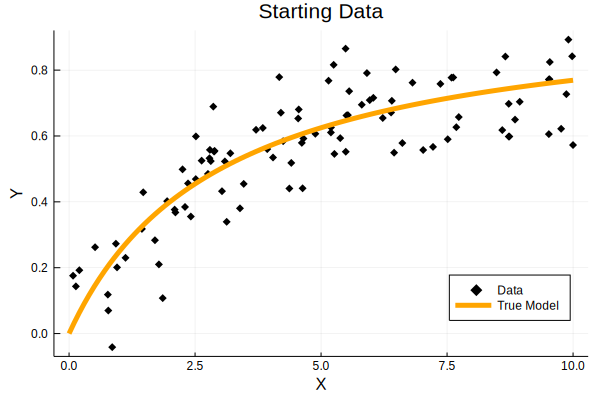

In [97]:
Random.seed!(1);
x = rand(Uniform(0,10),100)
f(x; b=3) = x/(b + x) # <--- The true model, with b=3
y = f.(x)  + rand(Normal(0,0.1),100) 

# Plot the raw data
scatter(x,y, marker=:diamond, color=:black, 
    xlabel="X", ylabel="Y", label="Data",
    title="Starting Data", legend=:bottomright)

# Plot the "True" model
xvec = 0:0.1:10
plot!(xvec,f.(xvec), label="True Model", linewidth=5, color=:orange)

### Your work starts here:

In [102]:
error_prime(b) = 2*sum((y - x ./ (b .+ x)) .* (x ./ (b .+ x).^2) ) 
# bb(b) = 2*sum((b*y + x .* y -x) .* x ./(b .+x) .^3) ##another way of writing error prime
error_prime(2), bb(2)

(-1.8994390767234777, -1.8994390767234781)

In [103]:
beta = my_bisection(error_prime,0,5)
estimated(x) = x/(beta+ x)

x1: 5 ,x0: 2.5 ,diff: 2.5
x1: 3.75 ,x0: 2.5 ,diff: 1.25
x1: 3.125 ,x0: 2.5 ,diff: 0.625
x1: 3.125 ,x0: 2.8125 ,diff: 0.3125
x1: 3.125 ,x0: 2.96875 ,diff: 0.15625
x1: 3.125 ,x0: 3.046875 ,diff: 0.078125
x1: 3.125 ,x0: 3.0859375 ,diff: 0.0390625
x1: 3.125 ,x0: 3.10546875 ,diff: 0.01953125
x1: 3.125 ,x0: 3.115234375 ,diff: 0.009765625
x1: 3.125 ,x0: 3.1201171875 ,diff: 0.0048828125
x1: 3.12255859375 ,x0: 3.1201171875 ,diff: 0.00244140625
x1: 3.121337890625 ,x0: 3.1201171875 ,diff: 0.001220703125
x1: 3.1207275390625 ,x0: 3.1201171875 ,diff: 0.0006103515625


estimated (generic function with 1 method)

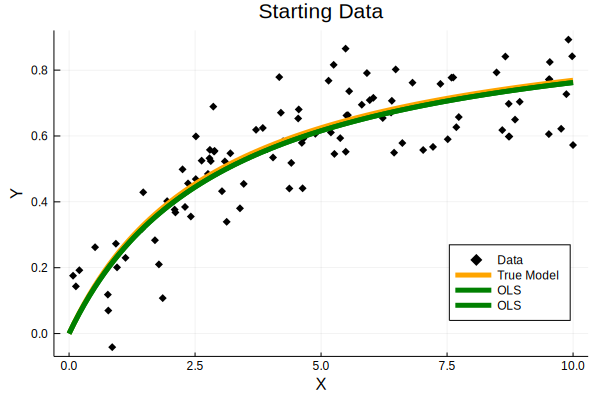

In [104]:
plot!(xvec, estimated.(xvec),label="OLS", linewidth=5, color=:green)